#### 사전준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### MNIST 다운로드

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

In [5]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
# MNIST 이미지 표현
def show_images(dataset, label, nrow, ncol):
    # 캔버스 설정
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(2*ncol, 2*nrow))
    ax = axes.ravel()

    xlabels = label[0:nrow*ncol]

    for i in range(nrow*ncol):
        image = dataset[i]
        ax[i].imshow(image, cmap='gray_r')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])

    plt.tight_layout()
    plt.show()


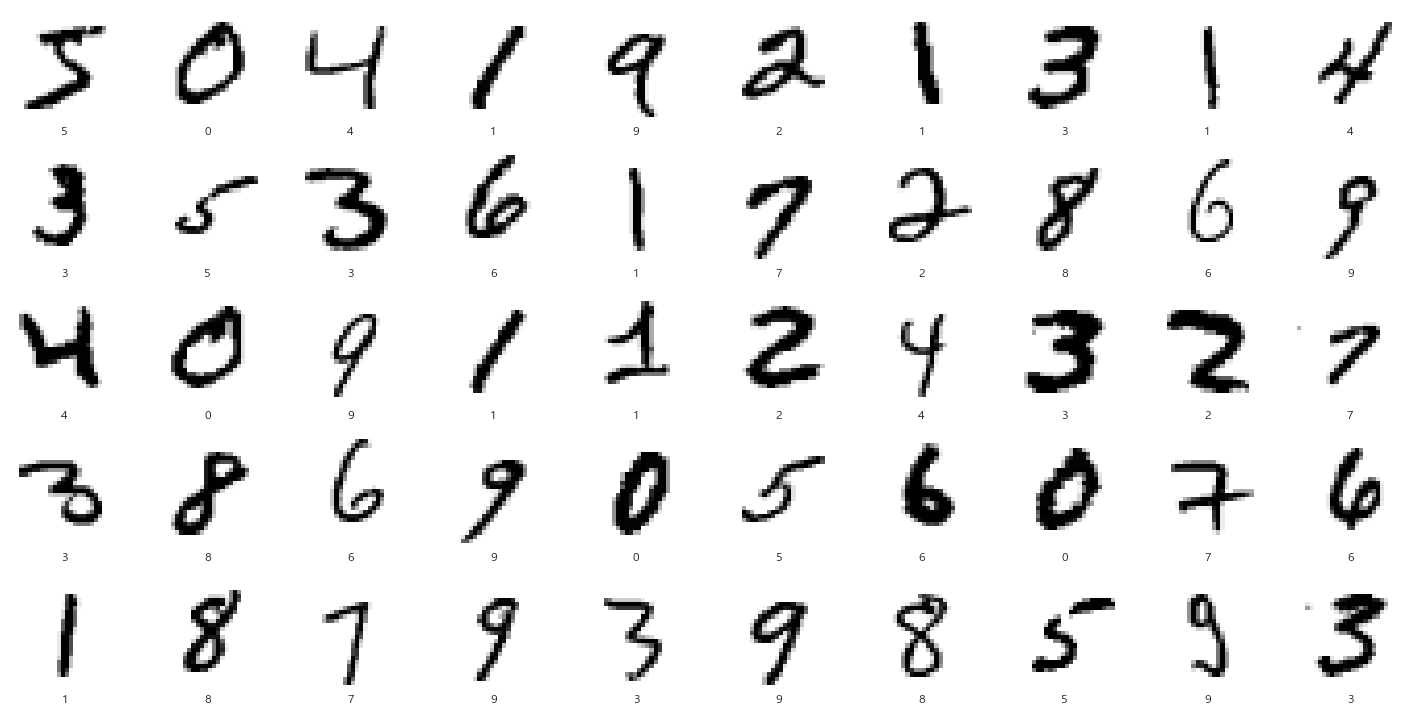

In [8]:
show_images(train_input, train_target, 5, 10)

In [11]:
model = keras.Sequential(name='ANN')
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(1000, activation='relu', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 1000)              785000    
                                                                 
 output (Dense)              (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_ann_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, verbose=1, validation_data=(test_input, test_target), 
                    batch_size=100, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
600/600 [==============================] - ETA: 0s - loss: 3.9541 - accuracy: 0.9170
Epoch 1: val_loss improved from inf to 0.80802, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 5s 8ms/step - loss: 3.9541 - accuracy: 0.9170 - val_loss: 0.8080 - val_accuracy: 0.9364
Epoch 2/20
597/600 [============================>.] - ETA: 0s - loss: 0.4224 - accuracy: 0.9591
Epoch 2: val_loss improved from 0.80802 to 0.43625, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 5s 8ms/step - loss: 0.4224 - accuracy: 0.9591 - val_loss: 0.4363 - val_accuracy: 0.9530
Epoch 3/20
597/600 [============================>.] - ETA: 0s - loss: 0.2274 - accuracy: 0.9685
Epoch 3: val_loss improved from 0.43625 to 0.42150, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 5s 8ms/step - loss: 0.2280 - accuracy: 0.9684 - val_loss: 0.4215 - val_accuracy: 0.9540
Epoch 4/20
600/600 [========================

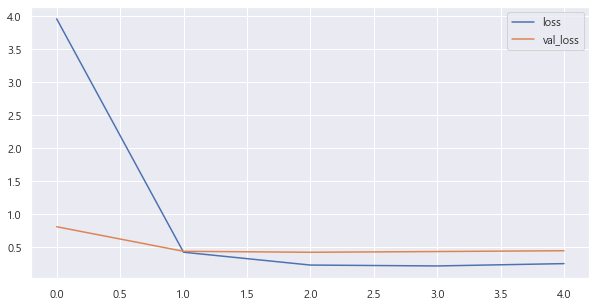

In [15]:
plot_target = ['loss', 'val_loss']
plt.figure(figsize=(10,5))

for each in plot_target:
    plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

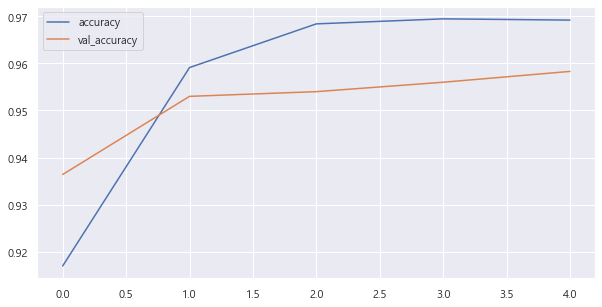

In [14]:
plot_target = ['accuracy', 'val_accuracy']
plt.figure(figsize=(10,5))

for each in plot_target:
    plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

In [16]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.4215 - accuracy: 0.9540


[0.4215030372142792, 0.9539999961853027]

In [17]:
# 예측된 결과값 리스트
pred_result = model.predict(test_input)

313/313 [==============================] - 1s 3ms/step


In [19]:
pred_labels = np.argmax(pred_result, axis=-1)
pred_labels[:10]
pred_labels.shape

(10000,)

##### 예측 실패한 이미지파악

In [20]:
wrong_result = []

for i in range(0, len(test_target)):
    if pred_labels[i] != test_target[i]:
        wrong_result.append(i)

len(wrong_result)

460

In [23]:
import random

samples = random.choices(population=wrong_result, k=16)
len(samples)

16

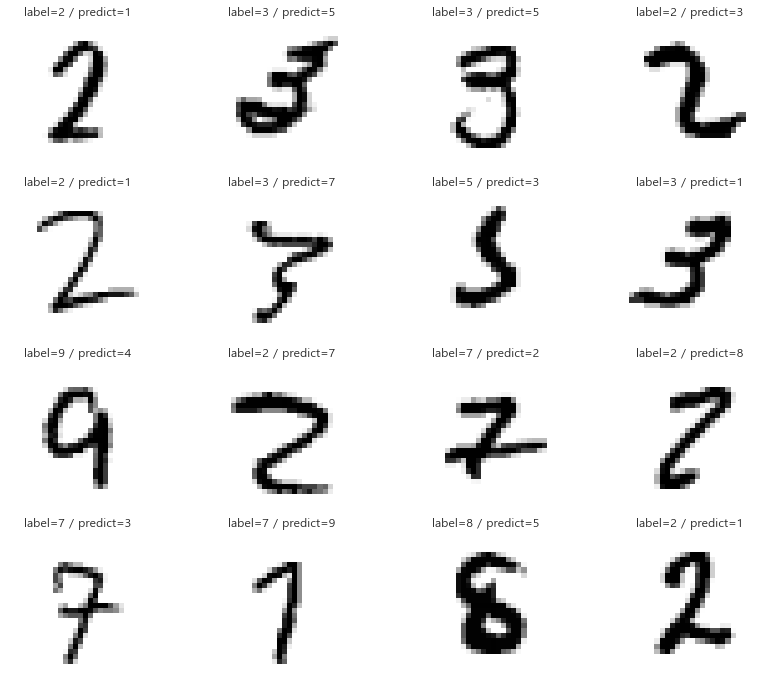

In [27]:
# 예측실패한 이미지 확인
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(test_input[n].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.title(f'label={test_target[n]} / predict={pred_labels[n]}')
    plt.axis('off')

plt.show()